### $ P_{gg}=(b_g+f\mu)^2P_{mm}(k)exp(-k^2\mu^2\sigma_r^2)+\frac{1}{\bar{n}_g}+N_{sys}$ 
### $ \bar{n_g}=\frac{f_{eff}}{1+z}\bar{n}_{g,0}$ 
### $ \sigma_{Pk}=2\pi \sqrt{\frac{1}{V_sk^2\Delta k}}P_{gg} $

In [4]:
from colossus.cosmology import cosmology
cosmo=cosmology.setCosmology('planck18')
import numpy as np
import matplotlib.pyplot as plt

kk = np.geomspace(8e-3, 2e-1, 1000)   # h/Mpc
nsys = 5e+4
feff = 0.5
h = cosmo.H0/100.

def damp(z):
    mu = -1.
    c = 3e+5
    sz = 0.002
    sd = c * sz*(1.+z) / cosmo.Hz(z) * h
    return np.exp(-kk**2 * mu**2 * sd**2)

def bias(z):
    return 1.+0.84*z

def pgg(z):
    return bias(z)**2 * cosmo.matterPowerSpectrum(kk, z)

def pgg_d(z):
    return bias(z)**2 * cosmo.matterPowerSpectrum(kk, z) * damp(z)

def noise(z,ng):
    ngal = feff/((1.+z))*ng
    return ngal+nsys

def vs(z_min, z_max):
    """ 
    the volume of a shell between z_min and z_max.
    retuen Vs in Mpc/h ^3
    """
    omega = 17500*(np.pi/180)**2
    d2 = cosmo.comovingDistance(0,z_min)
    d3 = cosmo.comovingDistance(0,z_max)   # Mpc/h
    return omega/3*(d3**3 - d2**3)  # (Mpc/h)^3

def err(z,ng):
    z_min = z-0.15
    z_max = z+0.15
    pg = pgg(z)+noise(z,ng)
    return 2.*np.pi / np.sqrt(vs(z_min,z_max)*kk[1:]*np.diff(kk)) * pg[1:]

def err_d(z,ng):
    z_min = z-0.15
    z_max = z+0.15
    pg = pgg_d(z)+noise(z,ng)
    return 2.*np.pi / np.sqrt(vs(z_min,z_max)*kk[1:]*np.diff(kk)) * pg[1:]

In [5]:
p1 = pgg(0.15)
e1 = err(0.15, 5.5e-2)
p1_d = pgg_d(0.15)#+1./5.5e-2
e1_d = err_d(0.15, 5.5e-2)
n1 = noise(0.15, 5.5e-2)

p2 = pgg(0.45)
e2 = err(0.45, 1.1e-2)
p2_d = pgg_d(0.45)#+1./1.1e-2
e2_d = err_d(0.45, 1.1e-2)
n2 = noise(0.45, 1.1e-2)

p3 = pgg(0.75)
e3 = err(0.75, 3.4e-3)
p3_d = pgg_d(0.75)#+1./3.4e-3
e3_d = err_d(0.75, 3.4e-3)
n3 = noise(0.75, 3.4e-3)

indices = [100, 200, 300, 400, 500, 600, 700, 800, 900, 998]
#indices = [150, 220, 300, 400, 500, 600, 700, 800, 900, 998]
kk1 = kk[indices]
pp1 = p1[indices]
ee1 = e1[indices]
pp2 = p2[indices]
ee2 = e2[indices]
pp3 = p3[indices]
ee3 = e3[indices]

pp1_d = p1_d[indices]
ee1_d = e1_d[indices]
pp2_d = p2_d[indices]
ee2_d = e2_d[indices]
pp3_d = p3_d[indices]
ee3_d = e3_d[indices]

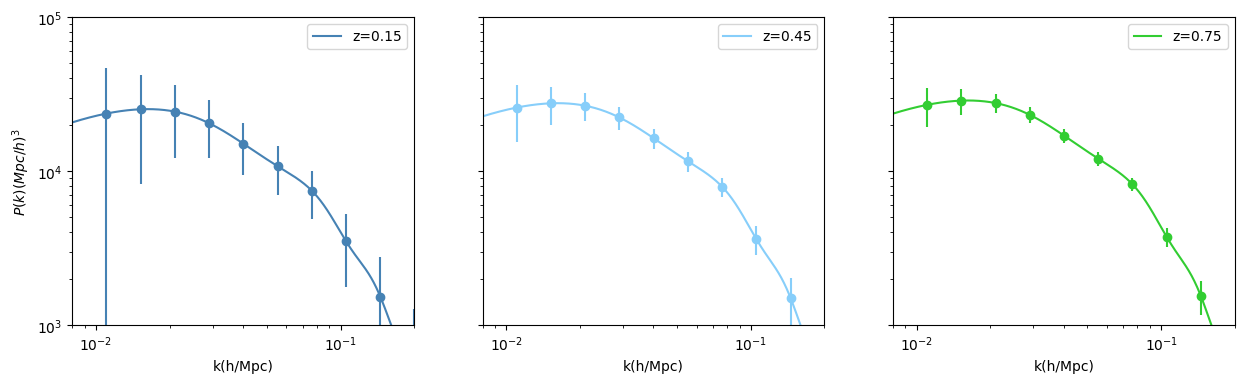

In [9]:
fig,ax = plt.subplots(1,3,figsize=(15,4),sharey = "all")
fig.subplots_adjust(hspace = 0)

#ax[0].loglog(kk, p1,color='r', label='no damping')
#ax[0].loglog(kk, p1+n1, label='with noise')
#ax[0].errorbar(kk1,pp1,ee1,fmt='o',color='r')
ax[0].loglog(kk, p1_d, label='z=0.15', color=(70/255,130/255,180/255))
ax[0].errorbar(kk1,pp1_d,ee1_d,fmt='o',color=(70/255,130/255,180/255))
ax[0].set_xlim([min(kk),max(kk)])
ax[0].set_ylim([1e+3, 1e+5])
ax[0].legend()
ax[0].set_xlabel('k(h/Mpc)')
ax[0].set_ylabel(r'$P(k) (Mpc/h)^3$')


#ax[1].loglog(kk, p2, color='r', label='no damping')
#ax[1].loglog(kk, p2+n2, label='with noise')
#ax[1].errorbar(kk1,pp2,ee2,fmt='o',color='r')
ax[1].loglog(kk, p2_d,  label='z=0.45',color=(135/255,206/255,250/255))
ax[1].errorbar(kk1,pp2_d,ee2_d,fmt='o',color=(135/255,206/255,250/255))
ax[1].set_xlim([min(kk),max(kk)])
ax[1].set_ylim([1e+3, 1e+5])
ax[1].legend()
ax[1].set_xlabel('k(h/Mpc)')
#ax[1].set_ylabel(r'$P(k) (Mpc/h)^3$')


#ax[2].loglog(kk, p3, color='r', label='no damping')
#ax[2].loglog(kk, p3+n3, label='with noise')
#ax[2].errorbar(kk1,pp3,ee3,fmt='o',color='r')
ax[2].loglog(kk, p3_d,  label='z=0.75',color=(50/255,205/255,50/255))
ax[2].errorbar(kk1,pp3_d,ee3_d,fmt='o',color=(50/255,205/255,50/255))
ax[2].set_xlim([min(kk),max(kk)])
ax[2].set_ylim([1e+3, 1e+5])
ax[2].legend()
ax[2].set_xlabel('k(h/Mpc)')
#ax[2].set_ylabel(r'$P(k) (Mpc/h)^3$')


plt.show()